In [32]:
import pandas as pd 
import requests
import numpy as np
import re
import warnings
from pandas import json_normalize


In [33]:
import os.path

file_exists = os.path.exists("inst_full.csv")

print(file_exists)

True


THE CELL BEOW CHECKS TO SEE IF YOU ALREADY HAVE THE DATA AND IF NOT SENDS GET REQUESTS TO THE API

NOTE - THIS DOES NOT CHECK TO ENSURE THE FILE IS CURRENT OR FREE OF ERRORS.  IF YOU WOULD LIKE TO UPDATE YOUR FILE OR YOU ARE CONCERNED THAT YOUR FILE HAS ERRORS, SIMPLY DELETE YOUR FILE AND A NEW, UPDATED FILE WILL BE CREATED.

The last 20 lines in the cell below (most of the code in the ELSE statement) cleans the data by checking for columns with mixed data types and converting the entire column to strings.  It converts the data type, but also displays an error to identify the affected columns.  This is a solution I found on stackoverflow that I wanted to implement in my code.

In [34]:

import pandas


if file_exists == False:
    print("FILE DOES NOT EXIST")

    response_API = requests.get('https://banks.data.fdic.gov/api/institutions?limit=10000&offset=0')
    #print(response_API.status_code)

    response_API2 = requests.get('https://banks.data.fdic.gov/api/institutions?limit=10000&offset=10000')
    #print(response_API2.status_code)

    response_API3 = requests.get('https://banks.data.fdic.gov/api/institutions?limit=10000&offset=20000')
    #print(response_API3.status_code)

    print("Get request sucessful from API")


    data = response_API.json()
    #print(type(data))

    data2 = response_API2.json()
    #print(type(data2))

    data3 = response_API3.json()
    #print(type(data3))



    institution_df = json_normalize(data['data'])
    #print(institution_df.head())
    #institution_df.to_csv('inst.csv')

    institution_df2 = json_normalize(data2['data'])
    #print(institution_df2.head())
    #institution_df2.to_csv('inst2.csv')

    institution_df3 = json_normalize(data3['data'])
    #print(institution_df3.head())
    #institution_df3.to_csv('inst3.csv')
    
    print("Data from API converted to json")


    institution_df = institution_df.reindex(sorted(institution_df.columns), axis=1)
    institution_df2 = institution_df2.reindex(sorted(institution_df2.columns), axis=1)
    institution_df3 = institution_df3.reindex(sorted(institution_df3.columns), axis=1)



    full_data = [institution_df, institution_df2, institution_df3]
    df = pd.concat(full_data)
    df.columns = df.columns.str.lstrip("data.")
    df.to_csv('inst_full.csv')
    
    print("New file created, shape should be (27816, 168)")
    print(df.shape)
    

else:
    print("FILE ALREADY EXISTS")

    myfile = 'inst_full.csv'
    target_type = str  # The desired output type

    with warnings.catch_warnings(record=True) as ws:
        warnings.simplefilter("always")

        mydata = pandas.read_csv(myfile, sep="|", header=None)
        print("Warnings raised:", ws)
        # We have an error on specific columns, try and load them as string
        for w in ws:
            s = str(w.message)
            print("Warning message:", s)
            match = re.search(r"Columns \(([0-9,]+)\) have mixed types\.", s)
            if match:
                columns = match.group(1).split(',') # Get columns as a list
                columns = [int(c) for c in columns]
                print("Applying %s dtype to columns:" % target_type, columns)
                mydata.iloc[:,columns] = mydata.iloc[:,columns].astype(target_type)

    df = pd.read_csv('inst_full.csv')
    

FILE ALREADY EXISTS
Warnings raised: []


C:\Users\mjlaw\AppData\Local\Temp\ipykernel_9328\3671726210.py:82: DtypeWarning: Columns (108,109,110,152) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('inst_full.csv')


.append is being deprecated - which is why I chose to use .concat instead

Reformating the column names so they are all lower case and spaces are replaced with an underscore

In [35]:
#print(df.columns)
df.columns= df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
#print(df.columns)

In [36]:
bank_count = len(df)
print("There are", bank_count, "institutuions with data on the FDIC's API.\n")

active = df['active'].value_counts()[0]
print("There are", active, "active institutions registered with the FDIC.\n")

inactive = df['active'].value_counts()[1]
print("There are", inactive, "inactive institutions registered with the FDIC.\n")

There are 27816 institutuions with data on the FDIC's API.

There are 23098 active institutions registered with the FDIC.

There are 4718 inactive institutions registered with the FDIC.



In [37]:
active_df = df[df.active == 0]
print(len(active_df))
#print(active_df.head())

23098


In [38]:
inactive_df = df[df.active == 1]
print(len(inactive_df))
#print(inactive_df.head())

4718


In [39]:
min = "{:,.2f}".format(active_df["asset"].min())
max = "{:,.2f}".format(active_df["asset"].max())
mean = "{:,.2f}".format(active_df["asset"].mean())

print("The minimum assets held by an active FDIC registered institution are ${} \n".format(min))
print("The maximum assets held by an active FDIC registered institution are ${} \n".format(max))
print("The average assets held by an active FDIC registered institution are ${} \n".format(mean))

The minimum assets held by an active FDIC registered institution are $1.00 

The maximum assets held by an active FDIC registered institution are $510,083,000.00 

The average assets held by an active FDIC registered institution are $787,717.14 



In [40]:
min = "{:,.2f}".format(inactive_df["asset"].min())
max = "{:,.2f}".format(inactive_df["asset"].max())
mean = "{:,.2f}".format(inactive_df["asset"].mean())

print("The minimum assets held by an inactive FDIC registered institution are ${} \n".format(min))
print("The maximum assets held by an inactive FDIC registered institution are ${} \n".format(max))
print("The average assets held by an inactive FDIC registered institution are ${} \n".format(mean))

The minimum assets held by an inactive FDIC registered institution are $3,134.00 

The maximum assets held by an inactive FDIC registered institution are $3,308,575,000.00 

The average assets held by an inactive FDIC registered institution are $4,987,805.79 



In [41]:
min = "{:,.2f}".format(df["asset"].min())
max = "{:,.2f}".format(df["asset"].max())
mean = "{:,.2f}".format(df["asset"].mean().round(2))

print("The minimum assets held by an FDIC registered institution are ${} \n".format(min))
print("The maximum assets held by an FDIC registered institution are ${} \n".format(max))
print("The average assets held by an FDIC registered institution are ${} \n".format(mean))

The minimum assets held by an FDIC registered institution are $1.00 

The maximum assets held by an FDIC registered institution are $3,308,575,000.00 

The average assets held by an FDIC registered institution are $1,618,986.53 



In [42]:
"""

Standarad deviation for later analysis

std = df["data.ASSET"].std().round(2)
top_std = (mean + std).round(2)
btm_std = (mean - std).round(2)

print(std)
print("Most FDIC registed banks have between ${} and ${} \n".format(btm_std, top_std))


# to format as currency
#.style.format('${0:,.2f}')

"""

'\n\nStandarad deviation for later analysis\n\nstd = df["data.ASSET"].std().round(2)\ntop_std = (mean + std).round(2)\nbtm_std = (mean - std).round(2)\n\nprint(std)\nprint("Most FDIC registed banks have between ${} and ${} \n".format(btm_std, top_std))\n\n\n# to format as currency\n#.style.format(\'${0:,.2f}\')\n\n'

In [43]:
#To add banks with FDIC violations

absolute_path = os.path.abspath('')
relative_path = "ots-enforcement-order-listing.csv"
full_path = os.path.join(absolute_path, relative_path)
enforcment_df = pd.read_csv(full_path)
print(len(enforcment_df))
#print(enforcment_df.head())

3547


In [44]:
#print(enforcment_df.columns)
enforcment_df.columns= enforcment_df.columns.str.lower()
enforcment_df.columns = enforcment_df.columns.str.replace(' ', '_')
#print(enforcment_df.columns)

The next two cells remove improperly formatted docket numbers and then remove rows without docket numbers from the data frame

In [45]:
enforcment_df['docket_number'] = np.where(enforcment_df['docket_number'].str.startswith('H'), '', enforcment_df['docket_number'])

In [46]:
#create a new df so the old df is unaltered

#sorts the new df by docket number
enf_df1 = enforcment_df.sort_values('docket_number')

#converts emtpy strings to NaN and then drops rows that do not have a Docket Number
enf_df1['docket_number'].replace('', np.nan, inplace=True)
enf_df1.dropna(subset=['docket_number'], inplace=True)

#Gives the size and first columns of the new_enf_df
print(len(enf_df1.sort_values('docket_number')))
#print(enf_df1.head(5))

2029


In [47]:
#drops duplicates and adds 2 new colums to the new_enf_df

short_enf_df = enf_df1.drop_duplicates(subset=['docket_number'], keep='last')
#short_enf_df = short_enf_df.reindex(columns = new_enf_df.columns.tolist() + ['Number_of_Violations','Unique_Violations'])

#Gives the size and first columns of the short_enf_df
print(len(short_enf_df))
#print(short_enf_df.head())

837


In [48]:
violation_count_df = enf_df1.pivot_table(index = ['docket_number'], aggfunc ='size')
vc_df = violation_count_df.reset_index()
vc_df.columns = ['docket_number', 'total_violations']
#print(vc_df)

In [49]:
unique_violation_count_df = enf_df1.pivot_table(index = ['docket_number', "issue_date"], aggfunc ='size')
uvc_df = unique_violation_count_df.reset_index()
uvc_df.columns = ['docket_number', 'issue_date', 'violations']
#print(uvc_df)

In [50]:
final_uvc_df = uvc_df.pivot_table(index = ['docket_number'], aggfunc ='size')
fvc_df = violation_count_df.reset_index()
fvc_df.columns = ['docket_number', 'unique_violations']
#print(fvc_df)

In [51]:
violation_stats_df = vc_df.merge(fvc_df)
#print(violation_stats_df)

In [52]:
final_enf_df = short_enf_df.merge(violation_stats_df)
#print(final_enf_df.head)

In [53]:
df['docket'] = df['docket'].astype(str)
final_df = df.merge(final_enf_df, how='left', left_on='docket', right_on='docket_number')
small_final_df = final_df[['asset', 'chrtagnt', 'clcode', 'effdate', 'fdicregn', 'name', 'trust', 'total_violations', 'unique_violations']].copy()
#print(small_final_df.head)

In [54]:
small_final_df['total_violations'] = final_df['total_violations'].fillna(0)
small_final_df['unique_violations'] = final_df['unique_violations'].fillna(0)
small_final_df = small_final_df.reindex(columns = small_final_df.columns.tolist() + ['year', 'decade','violation', 'no_violation'])

In [55]:
small_final_df['year'] = small_final_df['effdate'].str[-4:].astype(int)
#print(small_final_df.head())

In [56]:
small_final_df['decade'] = (small_final_df['year'] / 10).astype(int) *10
#print(small_final_df.head())

In [57]:
small_final_df['violation'] = small_final_df['total_violations']
small_final_df['violation'].where(small_final_df['violation'] == 0, 1, inplace=True)

In [58]:
small_final_df['no_violation'] = small_final_df['violation'] - 1
small_final_df['no_violation'].where(small_final_df['no_violation'] == 0, 1, inplace=True)
print(small_final_df.head(500))

        asset chrtagnt  clcode     effdate     fdicregn  \
0         NaN    STATE      13  07/01/1981     New York   
1    712714.0    STATE      13  03/07/2002       Dallas   
2    338215.0      OCC       3  04/30/2018      Atlanta   
3    126549.0    STATE      13  10/16/1998      Atlanta   
4    144049.0    STATE      21  08/31/2022      Chicago   
..        ...      ...     ...         ...          ...   
495       NaN    STATE      21  05/13/1974  Kansas City   
496  279062.0      OCC       3  08/29/2000  Kansas City   
497   72045.0    STATE      13  08/31/2022  Kansas City   
498  132046.0    STATE      21  10/18/1996  Kansas City   
499   81765.0    STATE      21  01/02/2015  Kansas City   

                                         name  trust  total_violations  \
0                   Northeast Bank of Sanford    NaN               0.0   
1                         Bank of Bentonville    1.0               0.0   
2      Progressive Bank, National Association    1.0               0.

In [59]:
no_violation_df = small_final_df[small_final_df.total_violations == 0]
violation_df = small_final_df[small_final_df.total_violations != 0]

print(no_violation_df.shape[0])
print(violation_df.shape[0])

26992
824


In [60]:
small_final_df.to_json('final.json', orient='records', lines=True)
no_violation_df.to_json('no_violation.json', orient='records', lines=True)
violation_df.to_json('violation.json', orient='records', lines=True)

In [61]:
small_final_df.to_csv('final.csv')
no_violation_df.to_csv('no_violation.csv')
violation_df.to_csv('violation.csv')

'\n\ndf_total = df["Studied"] + df["Slept"] + df["Other"]\ndf_rel = df[df.columns[1:]].div(df_total, 0)*100\n  \nfor n in df_rel:\n    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], \n                                         df[n], df_rel[n])):\n        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + \'%\', \n                 va = \'center\', ha = \'center\')\n'

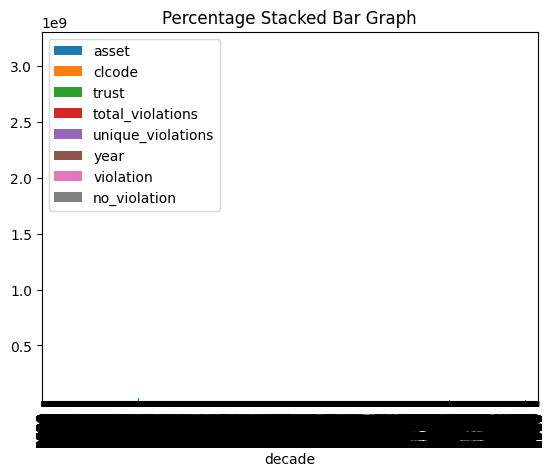

In [62]:
"""
import matplotlib

# plot a Stacked Bar Chart using matplotlib
small_final_df.plot(
  x = 'decade', 
  kind = 'bar', 
  stacked = True, 
  title = 'Percentage Stacked Bar Graph', 
  mark_right = True) 



df_total = df["Studied"] + df["Slept"] + df["Other"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')
"""